TODO: pursue at the end with the notebook C. (Generalized coordinates) ???

# 1. Asymmetrical bang-bang

## 1.1. Analytic solutions and pursuit 
In the case when $U_+ != U_-$

When solving the following differencial equation:

$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

in asymmetrical bang-bang, rather than symmetrical bang-bang having only one solution, the equation has several solutions.

Here we will solve this equation in case of an asymmetrical bang-bang : listing all the solutions and sort out which one is the most efficient in term of accuracy and movement time.

On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_+$  
  
We find:  $\dot{x}(t) = U_+\cdot\tau\left (1-e^{- \frac{t}{\tau}} \right )$ and so : $x(t) = U_+\cdot\tau\left [t-\tau\left(1-e^{- \frac{t}{\tau}} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_-$  
  
We find:  $\dot{x}(t) = U_-\cdot\tau\left (1-e^{\frac{T-t}{\tau}} \right ) + v\cdot e^{\frac{T-t}{\tau}}$ and so : $x(t) = x_T +v\cdot T- U_-\cdot\tau\left [T-t+\tau\left(1-e^{\frac{T-t}{\tau}} \right )\right] + v\cdot \tau\left(1-e^{\frac{T-t}{\tau}} \right )$

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_{\infty}$  
  
We find:  $U_{\infty} = \dfrac{1}{\tau}\cdot v$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = v$ (and $\ddot{x}(t) = 0$) and so : $x(t) = v\cdot \left ( t - T \right)+x_T+v\cdot T$

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
    
$U_+ = U_- \cdot \dfrac{1-e^{\frac{\left(1-\rho \right)T}{\tau}}}{1-e^{-\frac{\rho T}{\tau}}}$  
  
With the continuity of the position at time $\rho\cdot T$, we find relations between $U_-$ and $\rho$, and between $U_+$ and $\rho$ thanks to the previous formula.  

$U_- = \dfrac{1}{\tau} \cdot \dfrac{\left (x_T + v\cdot T+v\cdot\tau \right)\left (1-e^{-\frac{\rho T}{\tau}}\right)-v\cdot\rho\cdot T \left (1-e^{\frac{\left(1-\rho \right)T}{\tau}} \right )}{T-\left (1-\rho\right)T e^{-\frac{\rho T}{\tau}}-\rho T e^{\frac{\left(1-\rho \right)T}{\tau}}}$


In [1]:
import numpy as np
import numpy.random as alea
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [21]:
# import all the functions from HarrisWolpertandPursuit.py et PlotFunctions.py
from HarrisWolpertandPursuit import *
#from PlotFunctions import *

# simplify the call of the classes BangBang and MinimumVarianceControl
BB = BangBang()
MVC = MinimumVarianceControl()

#print(MVC.position())
print(MVC.array_A())

[[ 1.          0.001     ]
 [ 0.          0.92307692]]


Text(0,0.5,'u')

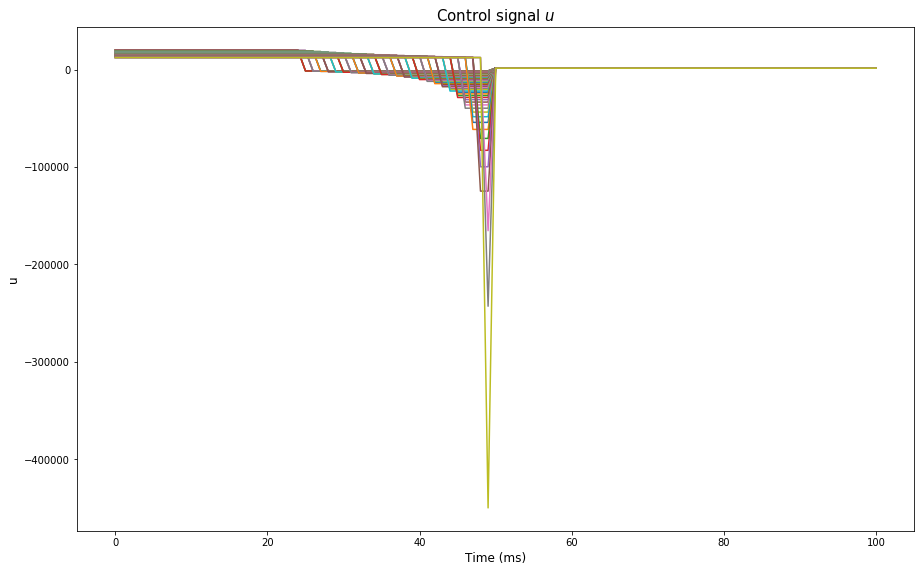

In [22]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in range(MVC.n_rho-1):
    ax.plot(MVC.time_ms(), MVC.U()[i,:])

#print(u[i,:])
#print(len(u[i,:]))
    
ax.set_title('Control signal $u$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('u', fontsize=12)

KeyboardInterrupt: 

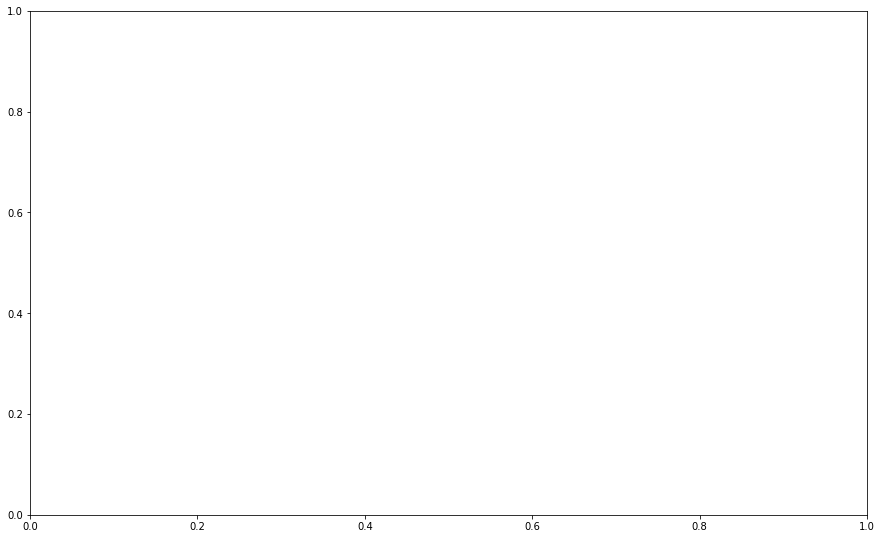

In [23]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in range(MVC.n_rho-1):
    ax.plot(MVC.time_ms(), MVC.position()[i,:])

ax.set_title('Position $x$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Position (deg)', fontsize=12)
    
ax.plot([0, (MVC.t_T+MVC.t_R)*1000], [MVC.xT, MVC.xT+MVC.v0*(MVC.T()+MVC.R()+1)*MVC.dt],'r--')


KeyboardInterrupt: 

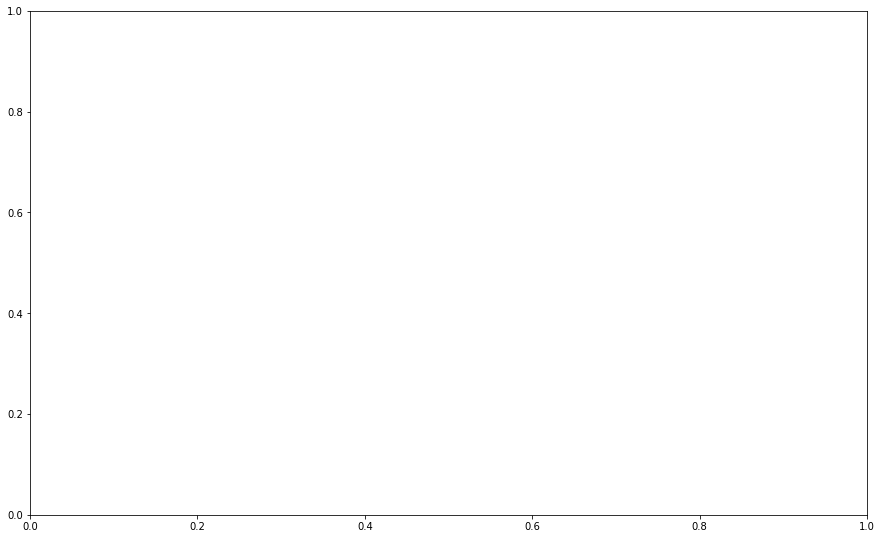

In [6]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in range(MVC.n_rho-1):
    ax.plot(MVC.time_ms(), MVC.velocity()[i,:])

ax.set_title('Velocity $v$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Velocity (deg/s)', fontsize=12)

## 1.2 Minimum Variance Theory

Now we want to optimize the movement of the eye using the Minimum Variance Theory developped by Harris and Wolpert (1998).

We will sort out the minimum variance regarding the several solutions of the asymmetrical bang-bang found previously.

In [ ]:
variancev = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        variancev[i,j] = variance(u[i,:], j)

In [ ]:
# from the previous results : store all the values of variance of trajectories (variances' functions) in the array somme 
somme = np.zeros(n-1)
for i in np.arange(n-1):
    for j in T+np.arange(R+1):
        somme[i] += variancev[i,j]

In [ ]:
# find the minimum variance from the array somme
ind_best = np.argmin(somme)

In [ ]:
# plot the variance of trajectories and highlight the minimum variance (in green)
fig_width = 10
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms, variancev[i,:]/dt,lw=2,color=(0.7-1.6*i/255,0.7-1.6*i/255,0.7-1.6*i/255))
    ax.set_title(r'Variance of trajectories', fontsize = 15)
    ax.set_xlabel('Time (ms)', fontsize=12)
    ax.set_ylabel('Variance', fontsize=12)
ax.plot(time_ms, variancev[ind_best,:]/dt,lw=3,color='g')

In [ ]:
# graphical representation : find the best rho depending on the value of the variance

fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(rho[0:n-1], somme,lw=3,color=(0,0,0))
ax.set_title(r'Evolution of total variance', fontsize = 15)
ax.set_xlabel(r'$\rho$', fontsize=12)
ax.set_ylabel('Variance', fontsize=12)
ax.plot([0.5,rho[n-1]],[somme[ind_best],somme[ind_best]],lw=2,color='g')
ax.plot([rho[ind_best],rho[ind_best]],[0,0.0006], color='r')
plt.text(0.73,0.0002,r'Best $\rho$', fontsize=10)

In [ ]:
# exact value of rho
rho[ind_best]

## 1.3. Graphical representation of asymmetrical bangbang

In the manifold solutions of the asymmetrical bang-bang we found the best solution to optimize the movement of the eye toward a target.

Now with the minimum variance value we can plot the control signal (u), position (x) and velocity (v) according to time.

In [ ]:
# Asymmetrical bangbang : control signal (u) according to time (in ms)

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, u[ind_best,:])

ax.set_title('Control signal $u$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('u', fontsize=12)

ax.plot([0,(t_T+t_R)*1000],[0,0],'r--')

In [ ]:
# Asymmetrical bangbang : position (x) according to time (in ms)

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms,position[ind_best,:])

ax.set_title('Position $x$', fontsize = 15)
ax.set_xlabel('time (ms)', fontsize=12)
ax.set_ylabel('Position (deg)', fontsize=12)

ax.plot([0,(t_T+t_R)*1000],[xT,xT+v0*(T+R+1)*dt],'r--')
ax.plot([0],[xT], marker = 'o')
ax.plot([(t_T+t_R)*1000],[xT+v0*(T+R+1)*dt], marker = 'o')

In [ ]:
# Asymmetrical bangbang : velocity (v) according to time (in ms)

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, velocity[ind_best,:])

ax.set_title('Velocity $v$', fontsize = 15)
ax.set_xlabel('time (ms)', fontsize=12)
ax.set_ylabel('Velocity (deg/s)', fontsize=12)

ax.plot([0,(t_T+t_R)*1000],[v0,v0],'r--')

This bang-bang model will thus lead to the illustration of the model of Harris and Wolpert (1998) in the third notebook (C. ...)

# 2. Noise integrated in the Minimum Variance model

In [ ]:
#TODO: create the pkl file in DataRecording

In [ ]:
# import the pickle from the records in the notebook C (from Harris and Wolpert model)

import pickle
import pandas as pd
record = pd.read_pickle('/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecording'+'HW_tau=0.013_dt=0.001_tT=0.043_tR=0.107_k=0.1_niter=5000_xT=10_v=10.0.pkl')

from PlotFunctions import plot_signal, plot_position, plot_velocity, plot_variance

In [ ]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(np.linspace(0,350,350), np.concatenate((np.zeros(100),record.position[5000],record.position[5000][149]+10*np.linspace(0,0.1,100))), '-', lw = 3, label="Eye")
ax.plot([0,0.35*1000],[9,12.5], 'r--', lw = 4, label="Target")
ax.plot([100,100],[0,13], lw = 3, color = 'black')
plt.text(40, 0.3, 'Delay', fontsize = 20)
ax.plot([143,143],[0,13], lw = 3, color = 'black')
plt.text(105, 0.3, 'Saccade', fontsize = 20)
plt.text(240, 0.3, 'Pursuit', fontsize = 20)
ax.legend(loc='upper left',prop={'size':25})

ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
#ax.set_xlim(0, 150)
ax.set_title('Minimum-variance model - Saccade + Pursuit', fontsize = 30)
ax.set_xlabel('Time (ms)', fontsize=25)
ax.set_ylabel(r'Position $x_t$', fontsize=25)


In [ ]:
#different k than before
k = 0.05

t_T = .059# saccade duration
t_R = .091 # pursuit duration
T = int(np.round(t_T/dt))
R = int(np.round(t_R/dt))
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
x0 = np.zeros(n) # starting point
xT = np.zeros(n) # ending point
xT[0] = 20
x0[0] = 0
#v = 10*np.cos(20*np.pi*time) # velocity of the target (deg/s)

In [ ]:
# definition of A and B

A = np.zeros((n,n))
B = np.zeros(n)
for i in np.arange(n):
    for j in np.arange(i,n):
        A[i,j] = dt**(j-i)/fact(j-i)
A[n-1, n-1] = 1-dt/tau
B[n-1] = dt

In [ ]:
def state_vector(u, t):
    if t == 0:
        return x0
    else:
        w = np.zeros(len(u))
        for i in np.arange(t):
            if u[i] != 0:
                w[i] = alea.normal(0,np.sqrt(k*(u[i])**2))
        return (ci[:,0:t]*np.flipud(u[0:t]+w[0:t])).sum(axis = 1)

In [ ]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ntest = 100
poss = np.zeros((ntest,T+R+0))
vels = np.zeros((ntest,T+R+0))

nshow = 10

col = np.zeros((nshow,3))
for i in np.arange(nshow):
    if i%2  == 0:
        col[i] = 1-alea.rand()/2, .4, .4
    else:
        col[i] = .4, .4, 1-alea.rand()/2

for j in np.arange(ntest):
    pos1 = np.zeros(T+R+0)
    pos2 = np.zeros(T+R+0)
    vel1 = np.zeros(T+R+0)
    vel2 = np.zeros(T+R+0)
    for i in np.arange(T+R):
        state_v = state_vector(record.signal[5000], i)
        pos1[i] = record.position[5000][i]
        pos2[i] = state_v[0]
        vel1[i] = record.velocity[5000][i]
        vel2[i] = state_v[1]
    poss[j, :] = pos2
    vels[j, :] = vel2
pos_mean = np.mean(poss, axis = 0)
vel_mean = np.mean(vels, axis = 0)
for j in np.arange(nshow):
    plt.figure(1)
    plt.plot(poss[j*ntest//nshow], color = col[j])

ecart_pos = np.zeros(T+R+0)
ecart_vel = np.zeros(T+R+0)

for i in np.arange(T+R+0):
    ecart_pos[i] = np.sqrt(np.var(poss[:,i]))
for i in np.arange(T+R+0):
    ecart_vel[i] = np.sqrt(np.var(vels[:,i]))
Iplus_pos = np.zeros(T+R+0)
Imoins_pos = np.zeros(T+R+0)
Iplus_vel = np.zeros(T+R+0)
Imoins_vel = np.zeros(T+R+0)
for i in np.arange(T+R+0):
    Iplus_pos[i] = record.position[5000][i]+2*np.sqrt(record.variance[5000][i])
    Imoins_pos[i] = record.position[5000][i]-2*np.sqrt(record.variance[5000][i])
    Iplus_vel[i] = record.velocity[5000][i]+2*ecart_vel[i]
    Imoins_vel[i] = record.velocity[5000][i]-2*ecart_vel[i]
plt.plot(Iplus_pos, lw = 4, ls = '--', color =(0,0.7,0),label='confidence interval')
plt.plot(Imoins_pos, lw = 4, ls = '--', color =(0,0.7,0))
plt.plot(pos_mean, lw = 6, color ='black', label='empirical mean')
plt.plot(pos1, lw = 2, color ='red',label='theoretical mean')

ax.set_title(r'Position $x_t$', fontsize = 30)
ax.set_xlabel('Time (ms)', fontsize=25)
ax.set_ylabel('Angle (deg)', fontsize=25)
ax.legend(loc='lower right',prop={'size':25})
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

for j in np.arange(nshow):
    plt.figure(2)
    plt.plot(vels[j*ntest//nshow], color = col[j])

plt.plot(Iplus_vel, lw = 2, ls = '--', color =(0,0.7,0),label='confidence interval')
plt.plot(Imoins_vel, lw = 2, ls = '--', color =(0,0.7,0))
plt.plot(vel_mean, lw = 3, color = 'black', label='empirical mean')
plt.plot(vel1, lw = 1, color = 'red',label='theoritical mean')
ax.set_title(r'Velocity $x_t$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Velocity ($deg.s^{-1}$)', fontsize=12)
ax.legend(loc='upper right',prop={'size':10})

In [ ]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(poss[0], lw=2,label='predicted real trajectory')
ax.plot(pos1,lw=3,label='predicted trajectory')
ax.set_title(r'Position $x_t$', fontsize = 30)
ax.set_xlabel('Time (ms)', fontsize=25)
ax.set_ylabel('Angle (deg)', fontsize=25)
ax.legend(loc='lower right',prop={'size':25})

In [ ]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ntest = 100
poss = np.zeros((ntest,T+R+1))

nshow = 10

for j in np.arange(ntest):
    pos1 = np.zeros(T+R+1)
    pos2 = np.zeros(T+R+1)

    for i in np.arange(T+R+1):
        state_v = state_vector(record.signal[5000], i)
        pos1[i] = record.position[5000][i]
        pos2[i] = state_v[0]

    poss[j, :] = pos2
pos_mean = np.mean(poss, axis = 0)

ecart_pos = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ecart_pos[i] = np.sqrt(np.var(poss[:,i]))

Iplus_pos = np.zeros(T+R+1)
Imoins_pos = np.zeros(T+R+1)
Iplus_pos2 = np.zeros(T+R+1)
Imoins_pos2 = np.zeros(T+R+1)
Iplus_pos3 = np.zeros(T+R+1)
Imoins_pos3 = np.zeros(T+R+1)
Iplus_pos4 = np.zeros(T+R+1)
Imoins_pos4 = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    Iplus_pos[i] = record.position[5000][i]+2*np.sqrt(record.variance[5000][i])
    Imoins_pos[i] = record.position[5000][i]-2*np.sqrt(record.variance[5000][i])
    Iplus_pos2[i] = record.position[5000][i]+np.sqrt(record.variance[5000][i])
    Imoins_pos2[i] = record.position[5000][i]-np.sqrt(record.variance[5000][i])
    Iplus_pos3[i] = record.position[5000][i]+.5*np.sqrt(record.variance[5000][i])
    Imoins_pos3[i] = record.position[5000][i]-.5*np.sqrt(record.variance[5000][i])
    Iplus_pos4[i] = record.position[5000][i]+1.5*np.sqrt(record.variance[5000][i])
    Imoins_pos4[i] = record.position[5000][i]-1.5*np.sqrt(record.variance[5000][i])
plt.plot(pos1, lw = 4, color = (0.3,0.45,0.3))

n_p = 20
for i in np.arange(n_p):
    plt.plot([(T+R)//n_p*i, (T+R)//n_p*i], [Iplus_pos[(T+R)//n_p*i], Imoins_pos[(T+R)//n_p*i]], lw = 2, marker = '_', color =(0.5,0.6,0.5))
    plt.plot([(T+R)//n_p*i-1/2, (T+R)//n_p*i+1/2], [Imoins_pos[(T+R)//n_p*i], Imoins_pos[(T+R)//n_p*i]], lw = 2, color =(0.5,0.6,0.5))
    plt.plot([(T+R)//n_p*i-1/2, (T+R)//n_p*i+1/2], [Iplus_pos[(T+R)//n_p*i], Iplus_pos[(T+R)//n_p*i]], lw = 2, color =(0.5,0.6,0.5))

plt.plot(Iplus_pos, ls = '--', lw = 3, color = (0.3,0.45,0.3))
plt.plot(Imoins_pos, ls = '--', lw = 3, color = (0.3,0.45,0.3))
plt.plot(Iplus_pos2, lw = 1, color = (0.3,0.6,0.3))
plt.plot(Imoins_pos2, lw = 1, color = (0.3,0.6,0.3))
plt.plot(Iplus_pos3, lw = 1, color = (0.3,0.6,0.3))
plt.plot(Imoins_pos3, lw = 1, color = (0.3,0.6,0.3))
plt.plot(Iplus_pos4, lw = 1, color = (0.3,0.6,0.3))
plt.plot(Imoins_pos4, lw = 1, color = (0.3,0.6,0.3))
ax.set_title(r'Position $x_t$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Angle (deg)', fontsize=14)
ax.set_xlim(-0, 100)


In [ ]:
plt.plot(ecart_pos)
ecc = np.zeros(T+R+1)
for i in np.arange(T+R+1):
    ecc[i] = np.sqrt(record.variance[5000][i])
plt.plot(ecc)

In [ ]:
Iplus_pos 

In [ ]:
pos1

In [ ]:
u = np.zeros(T+R)

for i in np.arange(T+R-1):
    u[i] = ((pos1[i+2]-pos1[i+1])/dt-(1-dt/tau)*(pos1[i+1]-pos1[i])/dt)/dt

In [ ]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
plt.plot(u)